In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
dajia = df['SiteName'].isin(['大甲']) #找大甲測站
df[dajia]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460277,461572,大甲,臺中市,35.0,懸浮微粒,良好,2.0,0.3,NaN,18,...,38.0,5.0,8.1,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460369,461664,大甲,臺中市,0.0,懸浮微粒,良好,0.0,0,NaN,0,...,0.0,0.0,8.1,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460439,461734,大甲,臺中市,33.0,懸浮微粒,良好,1.6,0.3,NaN,16,...,36.0,4.0,6.5,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460475,461770,大甲,臺中市,31.0,懸浮微粒,良好,1.4,0.3,NaN,16,...,34.0,4.0,5.0,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460563,461858,大甲,臺中市,57.0,細懸浮微粒,普通,1.2,0.3,NaN,17,...,32.0,18.0,5.1,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460724,462019,大甲,臺中市,67.0,細懸浮微粒,普通,0.7,0.3,NaN,18,...,31.0,22.0,4.4,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460814,462109,大甲,臺中市,67.0,細懸浮微粒,普通,0.9,0.3,NaN,20,...,32.0,22.0,4.4,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461133,462428,大甲,臺中市,41.0,懸浮微粒,良好,0.9,0.3,NaN,28,...,44.0,6.0,7.3,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461221,462516,大甲,臺中市,43.0,懸浮微粒,良好,0.6,0.4,NaN,29,...,46.0,6.0,7.8,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461307,462602,大甲,臺中市,46.0,懸浮微粒,良好,0.8,0.4,NaN,30,...,50.0,6.0,8.3,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
dajia = df['SiteName'].isin(['大甲']) #找大甲區域
dajia=df[dajia].drop(columns=['O3','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column
dajia.drop([0, 1],inplace=True)
dajia.reset_index(drop=True,inplace=True)
dajia['pr']=''

dajia

,SO2,CO,PM10,PM25,NO2,pr
0,1.6,0.3,36.0,4.0,6.5,
1,1.4,0.3,34.0,4.0,5.0,
2,1.2,0.3,32.0,18.0,5.1,
3,0.7,0.3,31.0,22.0,4.4,
4,0.9,0.3,32.0,22.0,4.4,
5,0.9,0.3,44.0,6.0,7.3,
6,0.6,0.4,46.0,6.0,7.8,
7,0.8,0.4,50.0,6.0,8.3,
8,0.8,0.4,58.0,6.0,8.3,
9,1.9,0.4,61.0,22.0,7.7,


In [5]:
cd4 = dajia['PM25'].isin(['0'])
dajia[cd4] #輸出整筆資料

,SO2,CO,PM10,PM25,NO2,pr
231,4.0,0.54,74.0,0.0,9.9,
232,3.5,0.56,78.0,0.0,9.1,
406,0.0,0,0.0,0.0,12.8,
440,0.0,0,0.0,0.0,19.4,
581,0.0,0,0.0,0.0,20.3,
582,0.0,0,0.0,0.0,20.3,
656,2.0,0.55,53.0,0.0,25.5,
678,1.7,0.34,52.0,0.0,5.9,
679,1.7,0.34,52.0,0.0,5.9,
680,2.3,0.27,45.0,0.0,8.7,


In [6]:
dajia.replace({0:np.nan,0.0:np.nan}, inplace=True) #以前面數字來取代0值

dajia

,SO2,CO,PM10,PM25,NO2,pr
0,1.6,0.3,36.0,4.0,6.5,
1,1.4,0.3,34.0,4.0,5.0,
2,1.2,0.3,32.0,18.0,5.1,
3,0.7,0.3,31.0,22.0,4.4,
4,0.9,0.3,32.0,22.0,4.4,
5,0.9,0.3,44.0,6.0,7.3,
6,0.6,0.4,46.0,6.0,7.8,
7,0.8,0.4,50.0,6.0,8.3,
8,0.8,0.4,58.0,6.0,8.3,
9,1.9,0.4,61.0,22.0,7.7,


In [7]:
dajia.fillna(method='ffill', inplace=True) #以前面數字來取代0值


dajia

,SO2,CO,PM10,PM25,NO2,pr
0,1.6,0.3,36.0,4.0,6.5,
1,1.4,0.3,34.0,4.0,5.0,
2,1.2,0.3,32.0,18.0,5.1,
3,0.7,0.3,31.0,22.0,4.4,
4,0.9,0.3,32.0,22.0,4.4,
5,0.9,0.3,44.0,6.0,7.3,
6,0.6,0.4,46.0,6.0,7.8,
7,0.8,0.4,50.0,6.0,8.3,
8,0.8,0.4,58.0,6.0,8.3,
9,1.9,0.4,61.0,22.0,7.7,


In [8]:
cd4 = dajia['CO'].isin([0])
dajia[cd4] #輸出整筆資料

,SO2,CO,PM10,PM25,NO2,pr


In [9]:
dajia.to_csv('dajiapollution.csv')

dajia

,SO2,CO,PM10,PM25,NO2,pr
0,1.6,0.3,36.0,4.0,6.5,
1,1.4,0.3,34.0,4.0,5.0,
2,1.2,0.3,32.0,18.0,5.1,
3,0.7,0.3,31.0,22.0,4.4,
4,0.9,0.3,32.0,22.0,4.4,
5,0.9,0.3,44.0,6.0,7.3,
6,0.6,0.4,46.0,6.0,7.8,
7,0.8,0.4,50.0,6.0,8.3,
8,0.8,0.4,58.0,6.0,8.3,
9,1.9,0.4,61.0,22.0,7.7,


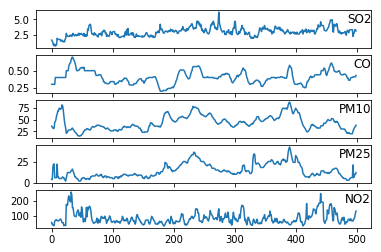

In [10]:
# load dataset
dataset =pd.read_csv('dajiapollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:500, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,CO,PM10,PM25,NO2,pr
0,1.6,0.30,36.0,4.0,54.0,NaN
1,1.4,0.30,34.0,4.0,39.0,NaN
2,1.2,0.30,32.0,18.0,40.0,NaN
3,0.7,0.30,31.0,22.0,33.0,NaN
4,0.9,0.30,32.0,22.0,33.0,NaN
5,0.9,0.30,44.0,6.0,62.0,NaN
6,0.6,0.40,46.0,6.0,67.0,NaN
7,0.8,0.40,50.0,6.0,72.0,NaN
8,0.8,0.40,58.0,6.0,72.0,NaN
9,1.9,0.40,61.0,22.0,66.0,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,PM10,PM25,NO2,pr
0,-0.882627,-0.679516,-0.679817,-1.219131,-0.966165,4.0
1,-1.009555,-0.679516,-0.768626,-1.219131,-1.197704,4.0
2,-1.136484,-0.679516,-0.857435,-0.190975,-1.182268,18.0
3,-1.453806,-0.679516,-0.901840,0.102783,-1.290319,22.0
4,-1.326877,-0.679516,-0.857435,0.102783,-1.290319,22.0
5,-1.326877,-0.679516,-0.324581,-1.072252,-0.842678,6.0
6,-1.517270,-0.399327,-0.235772,-1.072252,-0.765499,6.0
7,-1.390341,-0.399327,-0.058154,-1.072252,-0.688319,6.0
8,-1.390341,-0.399327,0.297083,-1.072252,-0.688319,6.0
9,-0.692234,-0.399327,0.430296,0.102783,-0.780934,22.0


In [13]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
def shuffle(X, Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
#合併輸出

# build Data, use last 23 hours to predict next 1 hours
##X_train,Y_train=train_window(train_set_scaled,66,6)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
##X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
#X_train.shape

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 5))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17920     
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 903       
_________________________________________________________________
activation_12 (Activation)   (None, 7)                 0         
Total para

5533/5533 [==============================] - 0s 63us/step - loss: 19.2312 - val_loss: 20.9341
Epoch 66/800
5533/5533 [==============================] - 0s 64us/step - loss: 19.4675 - val_loss: 20.7413
Epoch 67/800
5533/5533 [==============================] - 0s 64us/step - loss: 18.6241 - val_loss: 19.8607
Epoch 68/800
5533/5533 [==============================] - 0s 67us/step - loss: 18.7697 - val_loss: 20.6884
Epoch 69/800
5533/5533 [==============================] - 0s 71us/step - loss: 18.3479 - val_loss: 20.4027
Epoch 70/800
5533/5533 [==============================] - 0s 62us/step - loss: 18.5418 - val_loss: 20.1195
Epoch 71/800
5533/5533 [==============================] - 0s 64us/step - loss: 18.2756 - val_loss: 19.5343
Epoch 72/800
5533/5533 [==============================] - 0s 62us/step - loss: 17.9721 - val_loss: 18.9320
Epoch 73/800
5533/5533 [==============================] - 0s 65us/step - loss: 17.6492 - val_loss: 19.3884
Epoch 74/800
5533/5533 [==========================

5533/5533 [==============================] - 0s 41us/step - loss: 11.9863 - val_loss: 15.0958
Epoch 142/800
5533/5533 [==============================] - 0s 43us/step - loss: 11.7914 - val_loss: 14.6844
Epoch 143/800
5533/5533 [==============================] - 0s 42us/step - loss: 11.7762 - val_loss: 14.8820
Epoch 144/800
5533/5533 [==============================] - 0s 41us/step - loss: 11.9115 - val_loss: 14.4017
Epoch 145/800
5533/5533 [==============================] - 0s 41us/step - loss: 11.7420 - val_loss: 14.7085
Epoch 146/800
5533/5533 [==============================] - 0s 46us/step - loss: 11.6514 - val_loss: 14.6023
Epoch 147/800
5533/5533 [==============================] - 0s 50us/step - loss: 11.3541 - val_loss: 14.1880
Epoch 148/800
5533/5533 [==============================] - 0s 41us/step - loss: 11.5268 - val_loss: 14.4201
Epoch 149/800
5533/5533 [==============================] - 0s 41us/step - loss: 11.4788 - val_loss: 14.2422
Epoch 150/800
5533/5533 [=================

5533/5533 [==============================] - 0s 41us/step - loss: 8.8301 - val_loss: 12.5756
Epoch 218/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.6451 - val_loss: 12.1910
Epoch 219/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.5784 - val_loss: 12.0573
Epoch 220/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.6888 - val_loss: 11.9894
Epoch 221/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.4797 - val_loss: 11.7647
Epoch 222/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.4014 - val_loss: 11.7755
Epoch 223/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.5165 - val_loss: 12.1286
Epoch 224/800
5533/5533 [==============================] - 0s 41us/step - loss: 8.4272 - val_loss: 12.2916
Epoch 225/800
5533/5533 [==============================] - 0s 40us/step - loss: 8.3428 - val_loss: 12.0724
Epoch 226/800
5533/5533 [==========================

Epoch 294/800
5533/5533 [==============================] - 0s 52us/step - loss: 6.8506 - val_loss: 9.6122
Epoch 295/800
5533/5533 [==============================] - 0s 44us/step - loss: 6.6364 - val_loss: 9.8297
Epoch 296/800
5533/5533 [==============================] - 0s 41us/step - loss: 6.5513 - val_loss: 9.5459
Epoch 297/800
5533/5533 [==============================] - 0s 42us/step - loss: 6.4324 - val_loss: 9.5857
Epoch 298/800
5533/5533 [==============================] - 0s 43us/step - loss: 6.5442 - val_loss: 9.2245
Epoch 299/800
5533/5533 [==============================] - 0s 45us/step - loss: 6.6816 - val_loss: 10.1002
Epoch 300/800
5533/5533 [==============================] - 0s 45us/step - loss: 6.6177 - val_loss: 9.3661
Epoch 301/800
5533/5533 [==============================] - 0s 41us/step - loss: 6.3460 - val_loss: 9.5168
Epoch 302/800
5533/5533 [==============================] - 0s 41us/step - loss: 6.5248 - val_loss: 9.4615
Epoch 303/800
5533/5533 [====================

5533/5533 [==============================] - 0s 43us/step - loss: 5.6202 - val_loss: 7.9030
Epoch 372/800
5533/5533 [==============================] - 0s 44us/step - loss: 5.4181 - val_loss: 7.9960
Epoch 373/800
5533/5533 [==============================] - 0s 47us/step - loss: 5.4321 - val_loss: 8.0936
Epoch 374/800
5533/5533 [==============================] - 0s 42us/step - loss: 5.5765 - val_loss: 8.2134
Epoch 375/800
5533/5533 [==============================] - 0s 42us/step - loss: 5.3908 - val_loss: 8.1048
Epoch 376/800
5533/5533 [==============================] - 0s 43us/step - loss: 5.4878 - val_loss: 8.3487
Epoch 377/800
5533/5533 [==============================] - 0s 44us/step - loss: 5.7950 - val_loss: 8.3330
Epoch 378/800
5533/5533 [==============================] - 0s 42us/step - loss: 5.6228 - val_loss: 8.1375
Epoch 379/800
5533/5533 [==============================] - 0s 42us/step - loss: 5.4765 - val_loss: 8.0333
Epoch 380/800
5533/5533 [==============================] - 0

5533/5533 [==============================] - 0s 42us/step - loss: 4.9761 - val_loss: 7.3545
Epoch 449/800
5533/5533 [==============================] - 0s 42us/step - loss: 5.0379 - val_loss: 7.2985
Epoch 450/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.9296 - val_loss: 7.2354
Epoch 451/800
5533/5533 [==============================] - 0s 40us/step - loss: 4.9130 - val_loss: 7.4250
Epoch 452/800
5533/5533 [==============================] - 0s 40us/step - loss: 4.9046 - val_loss: 7.3601
Epoch 453/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.9111 - val_loss: 7.0508
Epoch 454/800
5533/5533 [==============================] - 0s 40us/step - loss: 4.9094 - val_loss: 7.1737
Epoch 455/800
5533/5533 [==============================] - 0s 41us/step - loss: 5.0862 - val_loss: 7.3097
Epoch 456/800
5533/5533 [==============================] - 0s 40us/step - loss: 5.0584 - val_loss: 7.0080
Epoch 457/800
5533/5533 [==============================] - 0

5533/5533 [==============================] - 0s 42us/step - loss: 4.6974 - val_loss: 6.5265
Epoch 526/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.4731 - val_loss: 6.5807
Epoch 527/800
5533/5533 [==============================] - 0s 40us/step - loss: 4.4485 - val_loss: 6.6276
Epoch 528/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.6030 - val_loss: 6.6618
Epoch 529/800
5533/5533 [==============================] - 0s 40us/step - loss: 4.5747 - val_loss: 6.9335
Epoch 530/800
5533/5533 [==============================] - 0s 42us/step - loss: 4.6868 - val_loss: 6.5735
Epoch 531/800
5533/5533 [==============================] - 0s 42us/step - loss: 4.4675 - val_loss: 6.3318
Epoch 532/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.4978 - val_loss: 6.5417
Epoch 533/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.4643 - val_loss: 6.5473
Epoch 534/800
5533/5533 [==============================] - 0

5533/5533 [==============================] - 0s 46us/step - loss: 4.2326 - val_loss: 6.3253
Epoch 603/800
5533/5533 [==============================] - 0s 47us/step - loss: 4.3124 - val_loss: 6.1044
Epoch 604/800
5533/5533 [==============================] - 0s 46us/step - loss: 4.4464 - val_loss: 6.0461
Epoch 605/800
5533/5533 [==============================] - 0s 44us/step - loss: 4.3208 - val_loss: 6.3065
Epoch 606/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.2204 - val_loss: 6.1382
Epoch 607/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.2610 - val_loss: 6.2363
Epoch 608/800
5533/5533 [==============================] - 0s 42us/step - loss: 4.3212 - val_loss: 6.1251
Epoch 609/800
5533/5533 [==============================] - 0s 42us/step - loss: 4.2784 - val_loss: 5.9976
Epoch 610/800
5533/5533 [==============================] - 0s 41us/step - loss: 4.3413 - val_loss: 6.2378
Epoch 611/800
5533/5533 [==============================] - 0

5533/5533 [==============================] - 0s 60us/step - loss: 3.9306 - val_loss: 6.0384
Epoch 680/800
5533/5533 [==============================] - 0s 63us/step - loss: 4.0402 - val_loss: 6.0193
Epoch 681/800
5533/5533 [==============================] - 0s 66us/step - loss: 3.9085 - val_loss: 6.1546
Epoch 682/800
5533/5533 [==============================] - 0s 67us/step - loss: 4.1213 - val_loss: 5.9390
Epoch 683/800
5533/5533 [==============================] - 0s 63us/step - loss: 4.0253 - val_loss: 5.8315
Epoch 684/800
5533/5533 [==============================] - 0s 67us/step - loss: 4.0979 - val_loss: 5.9195
Epoch 685/800
5533/5533 [==============================] - 0s 63us/step - loss: 4.0984 - val_loss: 6.0647
Epoch 686/800
5533/5533 [==============================] - 0s 68us/step - loss: 4.0032 - val_loss: 5.7831
Epoch 687/800
5533/5533 [==============================] - 0s 65us/step - loss: 3.9952 - val_loss: 5.8699
Epoch 688/800
5533/5533 [==============================] - 0

5533/5533 [==============================] - 0s 64us/step - loss: 3.8890 - val_loss: 5.7484
Epoch 757/800
5533/5533 [==============================] - 0s 61us/step - loss: 3.7258 - val_loss: 5.9183
Epoch 758/800
5533/5533 [==============================] - 0s 62us/step - loss: 3.7479 - val_loss: 5.5823
Epoch 759/800
5533/5533 [==============================] - 0s 66us/step - loss: 3.8941 - val_loss: 5.8544
Epoch 760/800
5533/5533 [==============================] - 0s 65us/step - loss: 3.8409 - val_loss: 5.6647
Epoch 761/800
5533/5533 [==============================] - 0s 61us/step - loss: 3.8289 - val_loss: 5.8256
Epoch 762/800
5533/5533 [==============================] - 0s 61us/step - loss: 3.9117 - val_loss: 5.6835
Epoch 763/800
5533/5533 [==============================] - 0s 65us/step - loss: 3.8431 - val_loss: 5.7688
Epoch 764/800
5533/5533 [==============================] - 0s 61us/step - loss: 3.7776 - val_loss: 5.6761
Epoch 765/800
5533/5533 [==============================] - 0

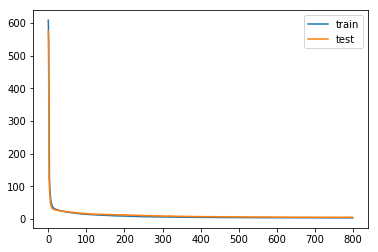

In [24]:
#model1
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

def buildManyToOneModel2(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel2(X_train.shape)

history=model.fit(X_train, Y_train, epochs=800, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Dajiamodel.h5')
del model

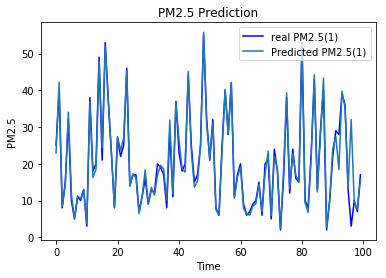

Train 1.2743981782693559
Validation 0.849194729136164
2.5311219289147658e+36
The R2 score on the Test set is:	0.970
Train Score: 1.51 RMSE
Test Score: 2.33 RMSE
The MSE   on the Test set is: 5.430327497317121
The RMSE  on the Test set is: 2.330306309762114
The MAE   on the Test set is: 1.5989450901478712
The MAPE  on the Test set is: 0.01710963649378799
The SMAPE on the Test set is: 0.015421835915346845


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [25]:
#讀取model1
model = load_model('Dajiamodel.h5')
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用